# NLP Node 2 : '멋진' 단어사전 만들기

- 프로젝트 목차가 다시 1번부터 시작합니다.
- Github 출력 이슈로 nbviewer 링크를 첨부합니다
    >https://nbviewer.org/github/xddf/Going_Deeper/blob/main/%5BNLP_02%5DTokenizer.ipynb

## 1. 기본 준비

In [1]:
import os

### 인스톨 부분(재실행 x)

In [2]:
!apt-get install g++ openjdk-8-jdk python3-dev python3-pip curl

Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.58.0-2ubuntu3.16).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless python-pip-whl python3-asn1crypto
  python3-cffi-backend python3-crypto python3-cryptography python3-idna
  python3-keyring python3-keyrings.alt python3-pkg-resources
  python3-secretstorage python3-setuptools python3-six python3-wheel
  python3-xdg x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic

In [3]:
!python3 -m pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 44.6 MB/s 


In [4]:
!sudo apt-get install curl git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.58.0-2ubuntu3.16).
git is already the newest version (1:2.17.1-1ubuntu0.9).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [5]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [80.4 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease

### import

In [6]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


In [7]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

## 2. 데이터 준비 및 전처리

### 데이터 다운로드

In [8]:
!wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz

--2022-03-24 04:39:06--  https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz [following]
--2022-03-24 04:39:06--  https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8718893 (8.3M) [application/octet-stream]
Saving to: ‘korean-english-park.train.tar.gz’

korean

### 경로 지정

In [9]:
!mkdir -p /content/drive/MyDrive/Aiffel/NLP/2.Cool_vocab/sp_tokenizer/data

In [10]:
path = '/content/drive/MyDrive/Aiffel/NLP/2.Cool_vocab/'

In [11]:
data_path = path + 'sp_tokenizer/data/'

In [12]:
!pwd

/content


In [13]:
!mv korean-english-park.train.tar.gz /content

mv: 'korean-english-park.train.tar.gz' and '/content/korean-english-park.train.tar.gz' are the same file


In [14]:
!tar -xzvf korean-english-park.train.tar.gz -C /content/drive/MyDrive/Aiffel/NLP/2.Cool_vocab/sp_tokenizer/data/

korean-english-park.train.en
korean-english-park.train.ko


In [15]:
path_to_file = '/content/drive/MyDrive/Aiffel/NLP/2.Cool_vocab/sp_tokenizer/data/korean-english-park.train.ko'

### 데이터 확인

In [16]:
with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


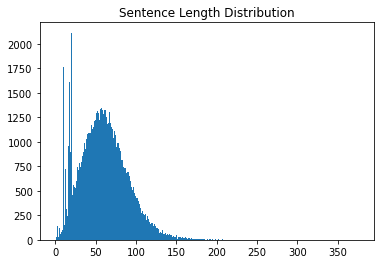

In [17]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [18]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


In [19]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [20]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

### 전처리

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


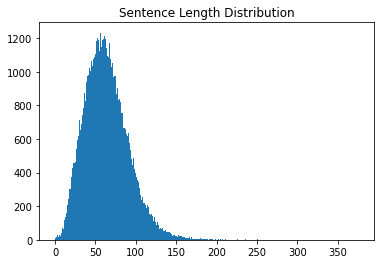

In [21]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


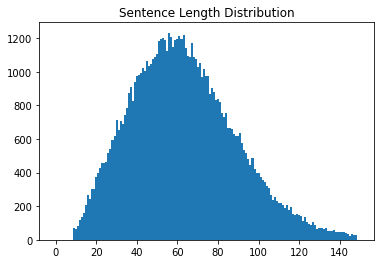

In [22]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

## 3. 토큰화

### 3.1. 공백 기반 토큰화

- 프리프로세스

In [23]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

- 공백 단위로 스플릿하여 리스트에 담는다.

In [24]:
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())

- 토큰화

In [25]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


- 생성된 단어장 확인

In [26]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


### 3.2. 형태소 기반 토큰화

In [27]:
# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어보세요. 
# Hint : mecab.morphs()를 사용해서 형태소분석을 합니다.
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [28]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


- 디코딩 Case 1

In [29]:
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

애 이티 앤 티 는 최신 블랙베리 모델 과 호환 되 는 광역 휴대 전화망 을 갖춘 유일 한 미국 통신 업체 다 .


- 디코딩 Case 2

In [30]:
sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

애 이티 앤 티 는 최신 블랙베리 모델 과 호환 되 는 광역 휴대 전화망 을 갖춘 유일 한 미국 통신 업체 다 . 


# 프로젝트 : SentencePiece 사용하기

## 1. 준비

### 1.1. 라이브러리 버전 확인

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import konlpy

print(tf.__version__)
print(np.__version__)
print(plt.__version__)
print(konlpy.__version__)

2.8.0
1.21.5
3.2.2
0.6.0


### 1.2. SentencePiece 설치하기

In [32]:
!pip install sentencepiece

     |████████████████████████████████| 1.2 MB 7.0 MB/s 


## 2. SentencePiece 모델 학습

In [33]:
import sentencepiece as spm
import os
temp_file = path_to_file

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

-rw-r--r-- 1 root root 376843 Mar 24 04:40 korean_spm.model
-rw-r--r-- 1 root root 146213 Mar 24 04:40 korean_spm.vocab


In [34]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1243, 11, 302, 7, 3608, 11, 287, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


## 3. 토크나이저 함수 작성

1) 매개변수로 토큰화된 문장의 list를 전달하는 대신 온전한 문장의 list 를 전달합니다.

2) 생성된 vocab 파일을 읽어와 { <word> : <idx> } 형태를 가지는 word_index 사전과 { <idx> : <word>} 형태를 가지는 index_word 사전을 생성하고 함께 반환합니다.

3) 리턴값인 tensor 는 앞의 함수와 동일하게 토큰화한 후 Encoding된 문장입니다. 바로 학습에 사용할 수 있게 Padding은 당연히 해야겠죠?

In [35]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [36]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[1956 5665    5    4 7975 1990    3    0    0    0    0    0    0    0]
 [ 107 1641  101    4    0  417   11    4   14    0 1976    3    3    3]]


## 4. 네이버 영화리뷰 감정 분석에 적용

- 네이버 영화리뷰 감정 분석 코퍼스에 SentencePiece를 적용시킨 모델 학습하기
- 학습된 모델로 sp_tokenize() 메소드 구현하기
- 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정 분석 모델을 재학습하기
- KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기
- (보너스) SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성능 개선 여부 확인하기

> 같은 데이터셋에 대한 Mecab 토크나이저와 비교를 위해 아래 포스트를 참조하여 비슷한 과정으로 진행
>> https://velog.io/@vg-rlo/Tensflow%EB%A1%9C-%EB%84%A4%EC%9D%B4%EB%B2%84-%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0-%EA%B0%90%EC%84%B1-%EB%B6%84%EB%A5%98%EA%B8%B0-%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0

In [37]:
import pandas as pd
import tensorflow as tf
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter


In [38]:
import random
# 랜덤 시드를 고정
def set_seeds(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    
SEED = 1234
set_seeds(SEED)

### 4.1. 데이터 준비 및 확인

- 경로지정

In [39]:
data_path

'/content/drive/MyDrive/Aiffel/NLP/2.Cool_vocab/sp_tokenizer/data/'

In [40]:
os.listdir(data_path)

['ratings_train.txt',
 'ratings.txt',
 'ratings_test.txt',
 'korean-english-park.train.tar.gz',
 'korean-english-park.train.en',
 'korean-english-park.train.ko']

In [41]:
import pandas as pd

In [42]:
train_data_path = data_path + 'ratings_train.txt'
test_data_path = data_path +'ratings_test.txt'

- 데이터 읽어오기, 샘플확인

In [43]:
with open(train_data_path, "r") as f:
    train_data = f.read().splitlines()

print("Data Size:", len(train_data))

print("Example:")
for sen in train_data[0:100][::20]: print(">>", sen)

Data Size: 150001
Example:
>> id	document	label
>> 3989148	약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.	1
>> 4805788	이 영화가 왜 이렇게 저평가 받는지 모르겠다	1
>> 8317483	백봉기 언제나오나요?	1
>> 9801316	아햏햏 아햏햏 아햏햏.	1


In [44]:
with open(test_data_path, "r") as f:
    test_data = f.read().splitlines()

print("Data Size:", len(test_data))

print("Example:")
for sen in test_data[0:100][::20]: print(">>", sen)

Data Size: 50001
Example:
>> id	document	label
>> 4174028	별 재미도없는거 우려먹어 .... 챔프에서 방송 몇번했더라 ? ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ	0
>> 5017089	셰익스피어는 셰익스피어고 이영화는 이영화.	0
>> 6335957	여름이면 한결같이 생각나는 드라마	1
>> 5840383	제시카 알바가 벗고 달려드는데 쌩까는게 말이 되냐?	0


In [45]:
min_len = 999
max_len = 0
sum_len = 0

for sen in train_data:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("트레인 데이터 문장의 최단 길이:", min_len)
print("트레인 데이터 문장의 최장 길이:", max_len)
print("트레인 데이터 문장의 평균 길이:", sum_len // len(train_data))

트레인 데이터 문장의 최단 길이: 8
트레인 데이터 문장의 최장 길이: 168
트레인 데이터 문장의 평균 길이: 45


In [46]:
min_len = 999
max_len = 0
sum_len = 0

for sen in test_data:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("테스트 데이터 문장의 최단 길이:", min_len)
print("테스트 데이터 문장의 최장 길이:", max_len)
print("테스트 데이터 문장의 평균 길이:", sum_len // len(test_data))

테스트 데이터 문장의 최단 길이: 9
테스트 데이터 문장의 최장 길이: 163
테스트 데이터 문장의 평균 길이: 45


- 각 데이터셋의 분포 확인
- 분포가 거의 균일하니 전처리 과정은 하나의 프로세스로도 충분할 것 같다.

In [47]:
import matplotlib.pyplot as plt

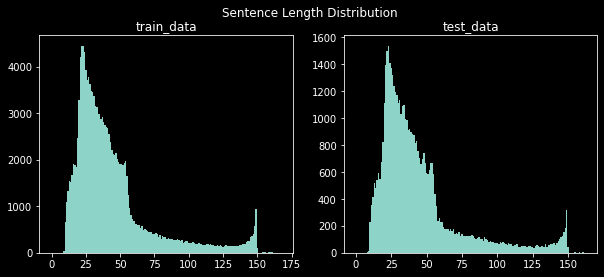

In [48]:
train_sentence_length = np.zeros(168)
test_sentence_length = np.zeros(163)

for sen in train_data:
    train_sentence_length[len(sen)-1] += 1

for sen in test_data:
    test_sentence_length[len(sen)-1] += 1    

plt.style.use(['dark_background'])
fig, ax = plt.subplots(1,2, figsize=(10, 4))

ax[0].bar(range(168), train_sentence_length, width=1.0)
ax[0].set_title("train_data")
ax[1].bar(range(163), test_sentence_length, width=1.0)
ax[1].set_title("test_data")

plt.suptitle('Sentence Length Distribution')
plt.show()

#### 4.1.1. 데이터 분포 해석

- 특별히 분포가 두드러지는 부분은 문장 길이 150 인근이 있다.

- 원본 데이터 페이지의 속성(Characteristics)탭에는 모든 리뷰는 140자 이하라고 명시되어 있다.

- 현재 네이버 영화리뷰는 최대 1000자 작성이 가능하나, 150자 인근에서 분포가 다시 높아지는 것을 보면 당시 최대 길이 제한이 150자였을 것 같음.

- 길이가 1인 문장, 길이가 160이 넘는 문장을 확인해보겠음

In [49]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(train_data, 10)

304515	음	1
444938	k	1
20433	gg	0
132033	음	0
181912	!	1
359141	굿	1
216228	.	0
2172111		1
24994	ㅇㅇ	0
323254	시	1
104253	굿	1
669245	굿	1
864206	굿	1
6369843		1
684649	굿	1
420354	1	0
288847	굿	0
192388	굿	1
656578	굿	1
96210	강추	1
596948	굿	0
30570	10	1
58414	고전	0
129589	g	1
81044	大作	1
15565	ㅡㅡ	0
417105	즐	0
298858	굿	1
697084	굳	1
200387	g	0
25038	ㅉㅉ	0
202066	음	0
1034280		0
461077	굿	1
200855	굿	1
168734	h	1
20438	굿!	1
371946	굳	1
5942978		0
843536	.	0
101208	k	0
571771	즐	0
404477	a	1
1034283		0
363915	.	0


In [50]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in train_data:
        if len(sen) >= length:
            print(sen)
            count += 1
            if count > 20: return

check_sentence_with_length(raw, 160)

9115532	"""상처투성이인 한국인을 위하여 어제는 추기경님이 계셨고 오늘은 교황님께서 치유하시고 가셨습니다. """" 고난이 나를 찾을때 피하고 싶은 내마음은""""하시며 노래부르실때는 한 인간으로서 사제로서 격었을 그분의 고난에 눈물이 흐릅니다. 이땅에 이런어른 더안계시나요"""	1
10141871	"""배우들 연기 :10점, 연출 :10점 , 스토리 : 10노잼 .. 내용이 짜집기가 안될거같을때 주인공이 """"이건현실이 아니야!!"""" 한마디하면서 게속 얼렁뚱땅 넘어가는느낌? 보는데 진짜 찝찝;; 내용이 앞뒤는 안맞고 뭐 자꾸 이건현실이 아니라면서넘어가니"""	0
8965519	"""이제 어른들이 어떻게 하면 좋을까? 라는 대사에서 느껴지는 무책임. 담임이 자신의 딸에게 """"무책임? 그런 건 몰라!"""" 에서 느껴지는 이중적인 모습에 소름 돋았다. 서바이벌 게임을 통해 그려진 그림 또한 실제 학급 모습과 크게 다르지 않다는 생각도..b"""	1
9147963	"""언제 보아도 감동적이고 가슴 찡해지는 예수님 이야기. 얼마 전에 감상한 """"손 오브 갓""""과 비교해 보면영화의 배경과 연출방식은 상당히 고전적이다. 하지만 """"손 오브 갓""""이 왠지 더 감동적이라는 생각이 든다.손~ 이 더 성경 말씀을 잘 표현했다"""	1
10113831	"""연출은 물론 배우들의 연기력 등 모든것이 완벽한 영화.모건 프리먼의 목소리가 영화의 몰입도를 더욱 높였다.""""태평양이 내 꿈에서처럼 푸르기를 희망한다.나는 희망한다.""""이 대사가 너무 좋았다ㅠ희망이라는 추상적인 명사에 대해 다시 생각하게되는 계기가 되었다"""	1
7156690	"""윤시윤,서재희역할 너무 머찌고 연기짱이였습니다.정말 몰입해서 잘 봤어요. 윤시윤배우의 가능성이 엿보이고, 이지아씨랑 연기호흡도 너무 좋았습니다. 어려운 상황에 좋은 작품 감동 적입니다. 이제 마지막회만 보면 """"나도꽃""""다시보기정복완료.이지아,윤시윤 짱짱"""	1
7635635	"""개 쓰레기 영화. 

In [51]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in test_data:
        if len(sen) >= length:
            print(sen)
            count += 1
            if count > 20: return

check_sentence_with_length(raw, 160)

7581339	"""욕하면서 보는 재미말곤 없음....그 재미를 넘어선 무서움만이 존재..--;TV는 바보상자라고 했더니...그 이상을 넘어섰다걸 이 드라마를 통해서 배우게 된다. 1,2화를 몇번 봤는데 정말 헐 그 자체임...차라리 """"백년의 막장""""이라는 이름이 낫다."""	0
10126801	"""""""우리 아이에게는 장애가 있어요""""가 이 영화의 명대사라고 자부하지만 국민의 사회적인식 수준을 현저히 떨어뜨리는 악대사였다. (장애인이 여성의 엉덩이를 만진 장면) 장애인에게는 인간의 기본 욕구인 성욕이라는 게 전혀 없고 오로지 순수함에.(글자수부족)"""	0
9284314	"""완전! 재밌더라~ 상투적이라고해도 상관없다~ 재밌었다!~ 김해숙 님의 연기 내공도 좋았고~""""미친 년~"""" 남발~ㅋ 이민정의 풋풋한 모습도 좋았음...어여~다시 대중에게 돌아와주길!~ 이정진은 말죽거리잔혹사 이후로 좋은 연기 보여줬음~ 정유미도 예쁨~^^"""	1
10060580	"""평식이가 평점 5 점 줬으면 ,최소한 곱하기 2 배 평점 10 점 줘도 되는 영화다(웃음)평식이는 크리스토퍼 놀란의다크나이트에도""""동전 던지기는 너무 진부래""""이러면서 평점 7점 주는 인간.평식이가 평론가면,나도 영화감독이다.스마트폰으로 촬영할줄은 아니까"""	1
8108106	"""차라리 막장이면 욕이나 하지 이건 개콘의 시청률의 제왕이 만드는 드라마보다 못해 작가랑 피디가 """"기왕 망한거 끝까지 가보자""""는 마음으로 제대로 낄낄대며 장난친듯. 웃어라 동해야 이후로 제대로 쓰레기를 만난 느낌ㅋㅋ 민폐녀 최세영은 드라마 최고악녀 등극"""	0
7745297	"""일전에 손주녀석이 물었습니다 """"할아버지는 전쟁영웅이에요?"""" 전 답했죠""""아니란다 .., 그저 영웅들과 함께했을 뿐이란다."""" 2차세계대전이나, 6.25나 자신의 민족과 평화를위해 자신들의 목숨을 위험천만한 전장에 내놓은사람들 모두가영웅입니다."""	1
8510204	"""원작인 """"Dino

In [52]:
for idx, _sum in enumerate(train_sentence_length):
    
    if _sum > 4000:
        print("Outlier Index:", idx+1)

Outlier Index: 22
Outlier Index: 23
Outlier Index: 24
Outlier Index: 25


- 분포표에서 확인할 수 있듯 특별히 이상치로 보이는 구간은 보이지 않았다.
- index 22 외에도 확인해보았으나 중복 제거 과정은 필요하지 않다.

In [53]:
check_sentence_with_length(train_data, 22)

9274899	GDNTOPCLASSINTHECLUB	0
8544678	뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아	0
6825595	지루하지는 않은데 완전 막장임... 돈주고 보기에는....	0
6723715	3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??	0
7898805	음악이 주가 된, 최고의 음악영화	1
6097171	마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다	0
8932678	갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한cg남무 아 그립다 동사서독같은 영화가 이건 3류아류작이다	0
6242223	이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네..	1
7462111	괜찮네요오랜만포켓몬스터잼밌어요	1
8425305	한국독립영화의 한계 그렇게 아버지가 된다와 비교됨	0
6900881	청춘은 아름답다 그 아름다움은 이성을 흔들어 놓는다. 찰나의 아름다움을 잘 포착한 섬세하고 아름다운 수채화같은 퀴어영화이다.	1
9629375	눈에 보이는 반전이었지만 영화의 흡인력은 사라지지 않았다.	1
9037756	"""스토리, 연출, 연기, 비주얼 등 영화의 기본 조차 안된 영화에 무슨 평을 해. 이런 영화 찍고도 김문옥 감독은 """"내가 영화 경력이 몇OO인데 조무래기들이 내 영화를 평론해?"""" 같은 마인드에 빠져있겠지?"""	0
10268521	소위 ㅈ문가라는 평점은 뭐냐?	1
2968565	최고!!!!!!!!!!!!!!!!	1
10107726	발연기 도저히 못보겠다 진짜 이렇게 연기를 못할거라곤 상상도 못했네	0
4174028	별 재미도없는거 우려먹어 .... 챔프에서 방송 몇번했더라 ? ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ	0
9305768	'13일의 금요일', '나이트메어'시리즈와 함께 가장 많은 시리즈를 양산해냈던 헬레이저 시리즈의 첫편. 작가의 상상력이 돋보이는 작품이며, 갈고리로 사지찢는 고어씬은 지금보더

### 4.2. 데이터 전처리

#### 4.2.1 그럼에도 중복확인

Data Size: 150001
문장의 최단 길이: 8
문장의 최장 길이: 168
문장의 평균 길이: 45


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


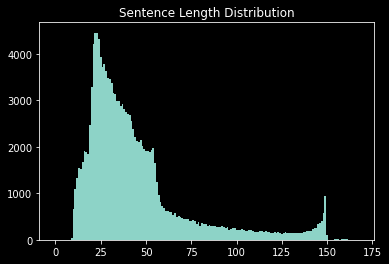

In [54]:
plt.style.use(['dark_background'])

min_len = 999
max_len = 0
sum_len = 0

cleaned_train = list(set(train_data))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_train))

for sen in cleaned_train:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_train))

train_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_train:   # 중복이 제거된 코퍼스 기준
    train_length[len(sen)-1] += 1

plt.bar(range(max_len), train_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

Data Size: 50001
문장의 최단 길이: 9
문장의 최장 길이: 163
문장의 평균 길이: 45


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


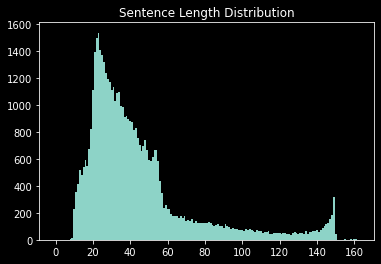

In [55]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_test = list(set(test_data))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_test))

for sen in cleaned_test:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_test))

test_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_test:   # 중복이 제거된 코퍼스 기준
    test_length[len(sen)-1] += 1

plt.bar(range(max_len), test_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

예상대로 중복된 데이터는 없다.

#### 4.2.2. 결측치 확인

- 데이터프레임이 아닌 방식으로 파일을 읽었을 때 결측치 처리를 하는 방법을 모르겠다(..)

- 해당 데이터는 스플릿되지 않은 전체 데이터를 제공하므로 데이터프레임으로 불러온 후 결측치를 확인해보겠음

In [56]:
all_data = pd.read_table(data_path + 'ratings.txt')

In [57]:
all_data.isnull().sum()

id          0
document    8
label       0
dtype: int64

- 리뷰 본문 부분에 8개의 결측 데이터가 있다.

### 4.3. 데이터 로더로 구성

데이터프레임으로 데이터를 불러와 구성

#### 4.3.1. 데이터 로더 함수 구성

In [58]:
train_data_path

'/content/drive/MyDrive/Aiffel/NLP/2.Cool_vocab/sp_tokenizer/data/ratings_train.txt'

In [152]:
train_data = pd.read_table('/content/drive/MyDrive/Aiffel/NLP/2.Cool_vocab/sp_tokenizer/data/ratings_train.txt')
test_data = pd.read_table('/content/drive/MyDrive/Aiffel/NLP/2.Cool_vocab/sp_tokenizer/data/ratings_test.txt')

In [60]:
from konlpy.tag import Mecab
import numpy as np
from collections import Counter

tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','.'] #.추가

def load_data(train_data, test_data, num_words=32000):
    #데이터 전처리  중복제거 -> 결측치 제거 (train , test )
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    # 정규표현식 적용 (한글, 공백, !, ? 제외 제거)
    train_data['document'] = train_data['document'].str.replace('[^ ㄱ-ㅣ 가-힣 ! ?]','')
    test_data['document'] = test_data['document'].str.replace('[^ ㄱ-ㅣ 가-힣 ! ?]','')

    # 공백, !, ? 기호가 반복될 경우 한 개로 축약
    train_data['document'] = train_data['document'].str.replace(' +', ' ')
    test_data['document'] = test_data['document'].str.replace(' +', ' ')
    
    train_data['document'] = train_data['document'].str.replace('\?+', '?')
    test_data['document'] = test_data['document'].str.replace('\?+', '?')

    train_data['document'] = train_data['document'].str.replace('!+', '!')
    test_data['document'] = test_data['document'].str.replace('!+', '!')


    #토큰화하면서 불용어 제거
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)
    
    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    #concatenate를 이용해서 
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['', '', '', ''] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
    word_to_index["<PAD>"] = 0
    word_to_index["<BOS>"] = 1
    word_to_index["<UNK>"] = 2  # unknown
    word_to_index["<UNUSED>"] = 3
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [61]:
print(f'train data number: {len(X_train)}, test data number: {len(X_test)}')
print(f'test data number:  {len(y_train)}, test data number: {len(y_test)}')

train data number: 146182, test data number: 49157
test data number:  146182, test data number: 49157


- 딕셔너리 생성

#### 4.3.2. 인코더 디코더 함수 생성 및 확인

In [62]:
index_to_word = {index:word for word, index in word_to_index.items()}

- 인코더/디코더 함수 생성

In [63]:
def get_encoded_sentence(sentence, word_to_index): # -----(1)
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

def get_encoded_sentences(sentences, word_to_index): # -----(2)
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

def get_decoded_sentence(encoded_sentence, index_to_word): # -----(3)
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

def get_decoded_sentences(encoded_sentences, index_to_word): # -----(14)
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [64]:
print(get_decoded_sentence(X_train[100], index_to_word))
print('라벨: ', y_train[100])  # 1번째 리뷰데이터의 라벨

<UNUSED> 작화 <UNUSED> 하나 카 나 연기 해 줘서 더 대박 였 다
라벨:  1


#### 4.3.3. 1차 가공 후의 분포 확인 등

In [65]:
total_data_text = X_train + X_test
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

문장길이 평균 :  13.936167380809772
문장길이 최대 :  83
문장길이 표준편차 :  11.568853380263857


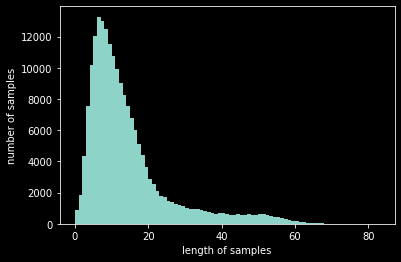

In [66]:

# 리뷰 길이 분포 확인
from matplotlib import pyplot as plt

plt.hist(num_tokens, bins=83)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [67]:
max_tokens = np.mean(num_tokens) + 2.5 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {:.3f}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

pad_sequences maxlen :  42
전체 문장의 0.953%가 maxlen 설정값 이내에 포함됩니다. 


- 95%의 데이터를 사용

### 4.4. 패딩, val 셋 분할

- post/pre 각각을 확인할 예정

#### 4.4.1. 패딩

In [68]:
import tensorflow as tf

X_train_post = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=maxlen)

X_test_post = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=maxlen)

print(f'X_train_post: {X_train_post.shape}')
print(f'X_test_post: {X_test_post.shape}')

X_train_post: (146182, 42)
X_test_post: (49157, 42)


In [69]:
X_train_pre = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre', # 혹은 'pre'
                                                        maxlen=maxlen)

X_test_pre = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre', # 혹은 'pre'
                                                       maxlen=maxlen)

print(f'X_train_pre: {X_train_post.shape}')
print(f'X_test_pre:  {X_test_pre.shape}')

X_train_pre: (146182, 42)
X_test_pre:  (49157, 42)


In [70]:
get_decoded_sentence(X_train[0], index_to_word)

'더 빙 진짜 짜증 나 네요 목소리'

In [71]:
X_train_pre[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  29,  69, 889,  35, 216,
        17,  30, 702], dtype=int32)

In [72]:
X_train_post[0]

array([ 29,  69, 889,  35, 216,  17,  30, 702,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0], dtype=int32)

#### 4.4.2. train_data를 스플릿

In [73]:
val_len = len(X_train_post)//5
val_len

29236

In [74]:
X_val_post = X_train_post[:val_len]
X_train_post = X_train_post[val_len:]

X_val_pre = X_train_pre[:val_len]
X_train_pre = X_train_pre[val_len:]

y_val = y_train[:val_len]
y_train = y_train[val_len:]

In [75]:
print(len(X_train_post), len(X_val_post))

116946 29236


### 4.4. 모델 구성 및 학습

- SentencePiece 토크나이저와의 비교가 최종 목적이므로, post/pre 외의 하이퍼파라미터 튜닝을 통한 ablation study는 진행하지 않는다.

- 단어장크기 = 32000

- 워드벡터 차원 수 = 300

In [76]:
vocab_size = 32000   
word_vector_dim = 300

- pre, post로 패딩된 데이터를 각각 확인하기 위해 함수화 한다.

In [77]:
def build_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(vocab_size,word_vector_dim , input_shape=(None,)))
    model.add(tf.keras.layers.LSTM(16))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


In [78]:
rnn_model_pre = build_model()

In [79]:
rnn_model_pre.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         9600000   
                                                                 
 lstm (LSTM)                 (None, 16)                20288     
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,620,705
Trainable params: 9,620,705
Non-trainable params: 0
_________________________________________________________________


In [80]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=1, verbose=0, mode='auto')

In [81]:
rnn_model_pre_his = rnn_model_pre.fit(X_train_pre,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_val_pre, y_val),
                    callbacks= [early_stopping],
                    verbose=1)

Epoch 1/10
1828/1828 [==============================] - 25s 10ms/step - loss: 0.3798 - accuracy: 0.8263 - val_loss: 0.3313 - val_accuracy: 0.8523
Epoch 2/10
1828/1828 [==============================] - 19s 10ms/step - loss: 0.2876 - accuracy: 0.8758 - val_loss: 0.3273 - val_accuracy: 0.8573
Epoch 3/10
1828/1828 [==============================] - 19s 10ms/step - loss: 0.2376 - accuracy: 0.8996 - val_loss: 0.3606 - val_accuracy: 0.8538


In [82]:
test = rnn_model_pre.evaluate(X_test_pre, y_test, verbose=2)

1537/1537 - 5s - loss: 0.3620 - accuracy: 0.8529 - 5s/epoch - 3ms/step


In [83]:
rnn_model_post = build_model()

In [84]:
rnn_model_post_his = rnn_model_post.fit(X_train_post,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_val_post, y_val),
                    callbacks= [early_stopping],
                    verbose=1)

Epoch 1/10
1828/1828 [==============================] - 21s 10ms/step - loss: 0.5917 - accuracy: 0.7001 - val_loss: 0.5658 - val_accuracy: 0.7451
Epoch 2/10
1828/1828 [==============================] - 18s 10ms/step - loss: 0.5291 - accuracy: 0.7612 - val_loss: 0.4342 - val_accuracy: 0.8054
Epoch 3/10
1828/1828 [==============================] - 18s 10ms/step - loss: 0.3708 - accuracy: 0.8384 - val_loss: 0.3518 - val_accuracy: 0.8426
Epoch 4/10
1828/1828 [==============================] - 18s 10ms/step - loss: 0.3011 - accuracy: 0.8720 - val_loss: 0.3517 - val_accuracy: 0.8467
Epoch 5/10
1828/1828 [==============================] - 19s 10ms/step - loss: 0.2596 - accuracy: 0.8908 - val_loss: 0.3698 - val_accuracy: 0.8476
Epoch 6/10
1828/1828 [==============================] - 19s 10ms/step - loss: 0.2238 - accuracy: 0.9073 - val_loss: 0.3874 - val_accuracy: 0.8446


In [85]:
test = rnn_model_post.evaluate(X_test_post, y_test, verbose=2)

1537/1537 - 5s - loss: 0.3902 - accuracy: 0.8388 - 5s/epoch - 3ms/step


패딩 방식별 정확도는 val과 test에서 약 0.85로 크게 차이나지 않았으나 학습효율 면에서 패딩pre가 훨씬 빠르게 수렴했다.

### 5. SentencePiece로 토큰화 및 비교

### 5.1.토크나이저 적용을 위해 데이터로더를 재구성

In [ ]:
# 원본 데이터 다시 불러오기
train_data = pd.read_table('/content/drive/MyDrive/Aiffel/NLP/2.Cool_vocab/sp_tokenizer/data/ratings_train.txt')
test_data = pd.read_table('/content/drive/MyDrive/Aiffel/NLP/2.Cool_vocab/sp_tokenizer/data/ratings_test.txt')

In [87]:
# from konlpy.tag import Mecab
# import numpy as np
# from collections import Counter

# tokenizer = Mecab()
# stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','.'] #.추가

# def load_data(train_data, test_data, num_words=32000):
#     #데이터 전처리  중복제거 -> 결측치 제거 (train , test )
#     train_data.drop_duplicates(subset=['document'], inplace=True)
#     train_data = train_data.dropna(how = 'any') 
#     test_data.drop_duplicates(subset=['document'], inplace=True)
#     test_data = test_data.dropna(how = 'any') 
    
#     # 정규표현식 적용 (한글, 공백, !, ? 제외 제거)
#     train_data['document'] = train_data['document'].str.replace('[^ ㄱ-ㅣ 가-힣 ! ?]','')
#     test_data['document'] = test_data['document'].str.replace('[^ ㄱ-ㅣ 가-힣 ! ?]','')

#     # 공백, !, ? 기호가 반복될 경우 한 개로 축약
#     train_data['document'] = train_data['document'].str.replace(' +', ' ')
#     test_data['document'] = test_data['document'].str.replace(' +', ' ')
    
#     train_data['document'] = train_data['document'].str.replace('\?+', '?')
#     test_data['document'] = test_data['document'].str.replace('\?+', '?')

#     train_data['document'] = train_data['document'].str.replace('!+', '!')
#     test_data['document'] = test_data['document'].str.replace('!+', '!')


#     #토큰화하면서 불용어 제거
#     X_train = []
#     for sentence in train_data['document']:
#         temp_X = tokenizer.morphs(sentence) # 토큰화
#         temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
#         X_train.append(temp_X)
    
#     X_test = []
#     for sentence in test_data['document']:
#         temp_X = tokenizer.morphs(sentence) # 토큰화
#         temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
#         X_test.append(temp_X)
    
#     #concatenate를 이용해서 
#     words = np.concatenate(X_train).tolist()
#     counter = Counter(words)
#     counter = counter.most_common(10000-4)
#     vocab = ['', '', '', ''] + [key for key, _ in counter]
#     word_to_index = {word:index for index, word in enumerate(vocab)}
#     word_to_index["<PAD>"] = 0
#     word_to_index["<BOS>"] = 1
#     word_to_index["<UNK>"] = 2  # unknown
#     word_to_index["<UNUSED>"] = 3
        
#     def wordlist_to_indexlist(wordlist):
#         return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]
        
#     X_train = list(map(wordlist_to_indexlist, X_train))
#     X_test = list(map(wordlist_to_indexlist, X_test))
        
#     return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    
# X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data) 

In [153]:
import sentencepiece as spm

vocab_size = 32000
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','.'] #.추가


def load_data(train_data, test_data, num_words=32000):
    #데이터 전처리  중복제거 -> 결측치 제거 (train , test )
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    # 정규표현식 적용 (한글, 공백, !, ? 제외 제거)
    train_data['document'] = train_data['document'].str.replace('[^ ㄱ-ㅣ 가-힣 ! ?]','')
    test_data['document'] = test_data['document'].str.replace('[^ ㄱ-ㅣ 가-힣 ! ?]','')

    # 공백, !, ? 기호가 반복될 경우 한 개로 축약
    train_data['document'] = train_data['document'].str.replace(' +', ' ')
    test_data['document'] = test_data['document'].str.replace(' +', ' ')
    
    train_data['document'] = train_data['document'].str.replace('\?+', '?')
    test_data['document'] = test_data['document'].str.replace('\?+', '?')

    train_data['document'] = train_data['document'].str.replace('!+', '!')
    test_data['document'] = test_data['document'].str.replace('!+', '!')

    y_train =  np.array(list(train_data['label'])) 
    y_test = np.array(list(test_data['label']))
    
    return train_data['document'], test_data['document'], y_train, y_test

train_data, test_data, y_train, y_test = load_data(train_data, test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [154]:
# SentencePiece 모델 학습
train_data.to_csv(data_path+'train_data.txt', sep='\n')
file_name = data_path+'train_data.txt'

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(file_name, vocab_size)    
)

!ls -l korean_spm*

-rw-r--r-- 1 root root 865152 Mar 24 07:31 korean_spm.model
-rw-r--r-- 1 root root 656151 Mar 24 07:31 korean_spm.vocab


In [155]:
# 검증
s = spm.SentencePieceProcessor()
s.Load('/content/korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[7296, 14016, 14560, 363, 20, 0]
['▁아버지가', '방에', '들어가', '신', '다', '.']
아버지가방에들어가신다 ⁇ 


### 5.2. pre/post 각각 토크나이저 함수 작성

In [156]:
def sp_tokenize_pre(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("/content/drive/MyDrive/Aiffel/NLP/2.Cool_vocab/sp_tokenizer/data/train_data.txt", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\n")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre')

    return tensor, word_index, index_word

In [157]:
def sp_tokenize_post(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("/content/drive/MyDrive/Aiffel/NLP/2.Cool_vocab/sp_tokenizer/data/train_data.txt", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\n")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [158]:
X_train_pre, index_word_train_pre, index_word_train_pre = sp_tokenize_pre(s, train_data)

In [159]:
X_test_pre, index_word_test_pre, index_word_test_pre = sp_tokenize_pre(s, test_data)

In [160]:
X_train_post, word_index_train_post, index_word_train_post = sp_tokenize_post(s, train_data)

In [161]:
X_test_post, word_index_test_post, index_word_test_post = sp_tokenize_post(s, test_data)

In [162]:
y_train[:5]

array([0, 1, 0, 0, 1])

In [163]:
y_test[:5]

array([1, 0, 0, 0, 0])

In [165]:
type(index_word_pre)

dict

In [166]:
train_data[:5]

0                                    아 더빙 진짜 짜증나네요 목소리
1                           흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                            교도소 이야기구먼 솔직히 재미는 없다평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

In [167]:
my_corpus = train_data[:5]
tensor, word_index, index_word = sp_tokenize_pre(s, my_corpus)
print(tensor)

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0    43   766    21 16893
   1400]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0  1242 14411 21834   469 19001   510  1153 10493  1085
    489]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0    14   687     0   718  4085 12528    12  2387
    397]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0 17424   257  7191   273   822    70   832
   9805]
 [ 3153  6822  5320 12018 25046  2335   344 12703     4     6 21075    47
   7926  4804  1139  1609  6107 14947     3   263  2092    11  1407  8613
  13999]]


In [168]:
my_corpus = train_data[:5]
tensor, word_index, index_word = sp_tokenize_post(s, my_corpus)
print(tensor)

[[   43   766    21 16893  1400     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [ 1242 14411 21834   469 19001   510  1153 10493  1085   489     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   14   687     0   718  4085 12528    12  2387   397     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [17424   257  7191   273   822    70   832  9805     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [ 3153  6822  5320 12018 25046  2335   344 12703     4     6 21075    47
   7926  4804  1139  1609  6107 14947     3   263  2092    11  1407  8613
  13999]]


### 5.3. 검증데이터셋 스플릿

In [169]:
val_len = len(X_train_post)//5
val_len

29236

In [170]:
X_val_post = X_train_post[:val_len]
X_train_post = X_train_post[val_len:]

X_val_pre = X_train_pre[:val_len]
X_train_pre = X_train_pre[val_len:]

y_val = y_train[:val_len]
y_train = y_train[val_len:]

In [171]:
print(len(X_train_post), len(X_val_post))

116946 29236


### 5.4. 모델 구성 및 학습

In [183]:
vocab_size = 32000   
word_vector_dim = 300

def build_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(vocab_size,word_vector_dim , input_shape=(None,)))
    model.add(tf.keras.layers.LSTM(16))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [184]:
rnn_model_pre = build_model()

In [185]:
rnn_model_pre.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 300)         9600000   
                                                                 
 lstm_5 (LSTM)               (None, 16)                20288     
                                                                 
 dense_15 (Dense)            (None, 16)                272       
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,620,705
Trainable params: 9,620,705
Non-trainable params: 0
_________________________________________________________________


In [186]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=0, mode='auto')

In [187]:
rnn_model_pre_his = rnn_model_pre.fit(X_train_pre,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_val_pre, y_val),
                    callbacks= [early_stopping],
                    verbose=1)

Epoch 1/10
1828/1828 [==============================] - 31s 16ms/step - loss: 0.3914 - accuracy: 0.8219 - val_loss: 0.3280 - val_accuracy: 0.8544
Epoch 2/10
1828/1828 [==============================] - 23s 13ms/step - loss: 0.2368 - accuracy: 0.9010 - val_loss: 0.3447 - val_accuracy: 0.8530
Epoch 3/10
1828/1828 [==============================] - 22s 12ms/step - loss: 0.1456 - accuracy: 0.9412 - val_loss: 0.4444 - val_accuracy: 0.8442


In [188]:
test = rnn_model_pre.evaluate(X_test_pre, y_test, verbose=2)

1537/1537 - 7s - loss: 0.4569 - accuracy: 0.8409 - 7s/epoch - 5ms/step


In [189]:
rnn_model_post = build_model()

In [190]:
rnn_model_post.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 300)         9600000   
                                                                 
 lstm_6 (LSTM)               (None, 16)                20288     
                                                                 
 dense_18 (Dense)            (None, 16)                272       
                                                                 
 dense_19 (Dense)            (None, 8)                 136       
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,620,705
Trainable params: 9,620,705
Non-trainable params: 0
_________________________________________________________________


In [191]:
rnn_model_post_his = rnn_model_post.fit(X_train_post,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_val_post, y_val),
                    callbacks= [early_stopping],
                    verbose=1)

Epoch 1/10
1828/1828 [==============================] - 26s 13ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.5024
Epoch 2/10
1828/1828 [==============================] - 23s 13ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.5024
Epoch 3/10
1828/1828 [==============================] - 23s 12ms/step - loss: 0.6932 - accuracy: 0.5014 - val_loss: 0.6931 - val_accuracy: 0.5024


In [192]:
test = rnn_model_post.evaluate(X_test_post, y_test, verbose=2)

1537/1537 - 7s - loss: 0.6932 - accuracy: 0.4973 - 7s/epoch - 4ms/step


### 5.5. 결과
- SentencePiece로 토큰화 한 경우 padding-pre와 padding-post의 차이가 크다.

- SentencePiece 토크나이저의 함수 구성을 보면 기본적으로 post로 되어있는데 의도적 함정이 아닐까 의심(..)이 든다

- 아무튼 pre의 경우 테스트 정확도 80%를 넘겼다. 야호


## 6. 마치며

### 기억에 남는 학습 내용
- 모델을 불러오고 데이터프레임에 저장하고, 다시 파일로 넣고 하는 과정이 제일 시간을 많이 잡아먹었고, 괴로웠고, 그래서 기억에 남음

### 어려웠던 점
- 토크나이저의 차이를 구분하는 것은 오히려 어려웠다.

- 정규표현식 적용이 노드 예제에 없었는데 이 부분을 직접 해보자니 생각보다 어려웠다.


### 추가로 해보고 싶은 점
- 딱히 없다. 빨리 다음 노드 해야하..

### 총평
: 화이팅?